# PyBGPSteam analysis

## LLaMA 13B

In [ ]:
import pypbgpstream

# Load the BGP data for the two time periods
bgp_data_15_17 = pypbgpstream.load_bgp_data('2020-01-15T15:00:00/2020-01-15T17:00:00')
bgp_data_18_13 = pypbgpstream.load_bgp_data('2020-01-18T12:00:00/2020-01-18T13:00:00')

# Extract the IPv4 prefixes and their AS path lengths
ipv4_prefixes = bgp_data_15_17['prefixes']
as_path_lengths_15_17 = [len(prefix['as_path']) for prefix in ipv4_prefixes]

ipv4_prefixes = bgp_data_18_13['prefixes']
as_path_lengths_18_13 = [len(prefix['as_path']) for prefix in ipv4_prefixes]

# Detect anomalies in AS path lengths
anomaly_threshold = 3  # adjust this threshold as needed

anomalies_15_17 = [prefix for prefix in as_path_lengths_15_17 if prefix > anomaly_threshold]
anomalies_18_13 = [prefix for prefix in as_path_lengths_18_13 if prefix > anomaly_threshold]

# Print the anomalies
print('Anomalies in AS path lengths for IPv4 prefixes on January 15, 2020:')
print(anomalies_15_17)

print('Anomalies in AS path lengths for IPv4 prefixes on January 18, 2020:')
print(anomalies_18_13)

`Perform BGP analysis and detect anomalies in AS path lengths for IPv4 prefixes over two time periods: from January 15, 2020, 15:00 to January 15, 2020, 17:00, and January 18, 2020, 12:00 to January 18, 2020, 13:00.`

In [ ]:
import pybgpstream
import datetime

# Define the time intervals
time_intervals = [
    (datetime.datetime(2020, 1, 15, 15, 0), datetime.datetime(2020, 1, 15, 17, 0)),
    (datetime.datetime(2020, 1, 18, 12, 0), datetime.datetime(2020, 1, 18, 13, 0))
]

# Function to detect anomalies in AS path lengths
def detect_anomalies(prefix, as_path):
    # Define your anomaly detection logic here
    # For example, you can check if the AS path length exceeds a certain threshold
    threshold = 5  # Adjust this threshold as needed
    if len(as_path) > threshold:
        print(f"Anomaly Detected for Prefix {prefix}: AS Path Length = {len(as_path)}")

# Iterate through each time interval
for start_time, end_time in time_intervals:
    print(f"Analyzing BGP Data for {start_time} to {end_time}...")

    # Create a BGPStream instance
    stream = pybgpstream.BGPStream(
        from_time=start_time,
        until_time=end_time,
        filter="prefix more specific",
    )

    # Iterate through the BGP data and analyze AS path lengths
    for entry in stream:
        if entry.type == 'A':
            # Process the BGP update message
            prefix = entry.fields['prefix']
            as_path = entry.fields['as-path'].split()
            as_path_length = len(as_path)

            # Detect anomalies in AS path lengths
            detect_anomalies(prefix, as_path)

print("BGP Analysis Complete")


`Corrections:`
1. Time format
2. filter for ipv4

`Score:` 0.8


`Examine BGP updates from the collector RRC04 between February 10, 2020, 09:00 to February 10, 2020, 21:00. Identify and report any missing or suspicious AS paths.`

In [ ]:
import pybgpstream
from datetime import datetime

# Define the time range
start_time = datetime(2020, 2, 10, 9, 0)
end_time = datetime(2020, 2, 10, 21, 0)

# Create a BGPStream instance
stream = pybgpstream.BGPStream()

# Set the filter for the RRC04 collector
stream.add_filter('collector', 'rrc04')

# Convert datetime objects to UNIX timestamps
start_timestamp = int(start_time.timestamp())
end_timestamp = int(end_time.timestamp())


# Set the time interval
stream.add_interval_filter(start_timestamp, end_timestamp)

# Define a function to check for suspicious AS paths
def is_suspicious(as_path):
    # You can define your criteria for suspicious AS paths here
    # For example, you can check if a specific ASN or pattern is present in the AS path
    # Modify this function based on your specific requirements
    suspicious_asn = "ASXXXXX"  # Replace with the ASN you want to check
    return suspicious_asn in as_path

# Iterate through BGP updates
for entry in stream:
    # Extract AS path from the BGP update
    as_path = entry.fields["as-path"]

    # Check for suspicious AS paths
    if is_suspicious(as_path):
        print("Suspicious AS Path:", as_path)
    else:
        print("AS Path:", as_path)


`Corrections:`
1. Time format

`Score:` 0.9


`Use PyBGPStream to conduct a historical analysis of the volume and frequency of AS prefix announcements from collector RRC15 on March 1, 2020, from 08:00 to 20:00. Compare this data with similar periods in the past to identify patterns, spikes, or anomalies in AS prefix announcements."`

In [ ]:
import pybgpstream
from datetime import datetime

# Define the time range for March 1, 2020, from 08:00 to 20:00
start_time = datetime(2020, 3, 1, 8, 0)
end_time = datetime(2020, 3, 1, 20, 0)

# Create a BGPStream instance
stream = pybgpstream.BGPStream()

# Set the filter for the RRC15 collector
stream.add_filter('collector', 'rrc15')

# Convert datetime objects to UNIX timestamps
start_timestamp = int(start_time.timestamp())
end_timestamp = int(end_time.timestamp())

# Set the time interval
stream.add_interval_filter(start_time, end_time) 

prefix_count = 0  # Total prefix announcements
hourly_counts = {}  # Hourly prefix counts

# Iterate through BGP updates
for entry in stream:
    prefix_count += 1

    # Get the timestamp for the update
    timestamp = entry.time

    # Extract the hour and minute from the timestamp
    hour = timestamp.hour
    minute = timestamp.minute

    # Calculate the time as HH:MM
    time_str = f"{hour:02}:{minute:02}"

    # Update the hourly counts
    if time_str not in hourly_counts:
        hourly_counts[time_str] = 1
    else:
        hourly_counts[time_str] += 1

print("Total Prefix Announcements:", prefix_count)
print("Hourly Prefix Counts:")
for hour, count in hourly_counts.items():
    print(f"{hour}: {count} prefixes")


`Corrections:`
1. date format
2. time format

`Score:` 0.8

`From the collector RRC06, gather BGP announcements for the IPv6 prefixes over a period from April 5, 2020, 12:00 to April 12, 2020, 12:00 and conduct a time-series analysis to observe trends."`

In [ ]:
import pybgpstream

## Define the desired time range
start_time = "2020-04-05T12:00:00"
end_time = "2020-04-12T12:00:00"

# Create a BGPStream instance
stream = pybgpstream.BGPStream(
    from_time="2020-03-01 08:00:00", until_time="2020-03-01 20:00:00",
    data_interface="rrc06",
    filter="ipv6",
    record_type="updates",
)

# Create dictionaries to store prefix and AS path information
prefix_count = {}
as_path_count = {}

# Iterate through BGP updates
for elem in stream:

    # Only consider IPv6 prefixes
    if elem.fields["prefix"].version() == 6:
        prefix = elem.fields["prefix"].str()
        as_path = elem.fields["as-path"].str()

        # Update prefix count
        if prefix in prefix_count:
            prefix_count[prefix] += 1
        else:
            prefix_count[prefix] = 1

        # Update AS path count
        if as_path in as_path_count:
            as_path_count[as_path] += 1
        else:
            as_path_count[as_path] = 1

# Print the top 10 prefixes by count
sorted_prefixes = sorted(prefix_count.items(), key=lambda x: x[1], reverse=True)
print("Top 10 IPv6 prefixes by count:")
for prefix, count in sorted_prefixes[:10]:
    print(f"{prefix}: {count} announcements")

# Print the top 10 AS paths by count
sorted_as_paths = sorted(as_path_count.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 AS paths by count:")
for as_path, count in sorted_as_paths[:10]:
    print(f"{as_path}: {count} announcements")


`Corrections:`
1. date format
2. filter
3. version
4. logic 
5. data_interface - wrong attribute
6. Cannot perform time-series analysis

`Score:` 0.0

`Using collector RRC03, identify MOAS (Multiple Origin AS) events for IPv4 prefixes between May 15, 2020, 01:00 to May 15, 2020, 23:00.`

In [ ]:
import pybgpstream

# Define the desired time range -.1
start_time = "2020-05-15T01:00:00"
end_time = "2020-05-15T23:00:00"

# Create a BGPStream instance
stream = pybgpstream.BGPStream(
    data_interface="rrc03",
    collectors=["rrc06"],
    filter="type ribs and path % MOAS",
    start_time=start_time,
    end_time=end_time,
)

# Create a dictionary to store MOAS events
moas_events = {}

# Iterate through BGP updates
for elem in stream:
    if "as-path" in elem.fields:
        prefix = elem.fields["prefix"]
        origin_asns = elem.fields["as-path"].split()
    
    # Check if it's a MOAS event (multiple origin ASNs for the same prefix)
    if len(origin_asns) > 1:
        if prefix in moas_events:
            moas_events[prefix].append(origin_asns)
        else:
            moas_events[prefix] = [origin_asns]

# Print the MOAS events
print("MOAS (Multiple Origin AS) Events:")
for prefix, origin_asns_list in moas_events.items():
    print(f"Prefix: {prefix}")
    for origin_asns in origin_asns_list:
        print(f"  Origin ASNs: {', '.join(origin_asns)}")
    print()


`Corrections:`
1. date format
2. data_interface - wrong attribute
3. filter
4. prefix str
5. error handling
6. message type

`Score:` 0.4

`Analyze BGP announcements from collector RRC12 between June 7, 2020, 10:00 to June 7, 2020, 22:00 and create a visual representation of AS relationships.`

In [ ]:
import pybgpstream
import networkx as nx
import matplotlib.pyplot as plt

# Define the desired time range
start_time = "2020-06-07T10:00:00"
end_time = "2020-06-07T22:00:00"

# Create a BGPStream instance
stream = pybgpstream.BGPStream(
    data_interface="rrc12",
    start_time=start_time,
    end_time=end_time,
)

# Create a directed graph to represent AS relationships
as_graph = nx.DiGraph()

# Iterate through BGP updates and add AS relationships to the graph
for elem in stream:
    if "as-path" in elem.fields:
        as_path = elem.fields["as-path"].split()
        for i in range(len(as_path) - 1):
            from_asn = as_path[i]
            to_asn = as_path[i + 1]
            as_graph.add_edge(from_asn, to_asn)

# Create a visual representation of the AS relationships
pos = nx.spring_layout(as_graph, seed=42)
nx.draw(
    as_graph,
    pos,
    with_labels=True,
    node_size=10,
    font_size=6,
    node_color="skyblue",
    edge_color="gray",
    alpha=0.7,
)

# Set plot attributes
plt.title("AS Relationships - June 7, 2020")
plt.axis("off")

# Show the plot
plt.show()


`Corrections:`
1. date format
2. data_interface - wrong attribute

`Score:` 0.8

`"Collect and study BGP community attributes and associated policies from collector RRC09 for IPv4 prefixes between July 20, 2020, 11:00 to July 20, 2020, 13:00."`

In [24]:
import pybgpstream
import pandas as pd

# Specify the desired time range
start_time = "2020-07-20T11:00:00"
end_time = "2020-07-20T13:00:00"

# Create a BGPStream instance
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    filter="collector RRC09 and (prefix more 0 and prefix less 32)",
)

# Create a DataFrame to store the BGP data
bgp_data = pd.DataFrame(columns=["timestamp", "prefix", "communities"])

# Iterate through BGP updates
for elem in stream:
    if elem.type == "A":
        # Process only BGP Announcements
        timestamp = elem.time
        prefix = elem.fields["prefix"]
        communities = elem.fields["communities"]

        # Append data to the DataFrame
        bgp_data = bgp_data.append(
            {"timestamp": timestamp, "prefix": prefix, "communities": communities},
            ignore_index=True,
        )

# Now, you have a DataFrame with BGP data.
# You can analyze and study the BGP community attributes and policies as needed.

# For example, you can print the first few rows of the DataFrame:
print(bgp_data.head())


2023-09-21 11:03:26 247992: bgpstream_filter_parser.c:177: ERROR: Expected a valid term, found '(prefix'


ValueError: Invalid filter string: collector RRC09 and (prefix more 0 and prefix less 32)

`Corrections:`
1. date format
2. Invalid filter -0.3

`Score:` 0.6

`"Capture BGP updates for IPv6 prefixes using collector RRC07 from August 10, 2020, 05:00 to August 10, 2020, 07:00. Store and categorize this data for future reference."`

In [ ]:
import pybgpstream

# Specify the desired time range
start_time = "2020-08-10T05:00:00"
end_time = "2020-08-10T07:00:00"

# Create a BGPStream instance
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    filter="collector RRC07 and (prefix more :: and prefix less ::ffff)",
)

# Define the file to store the BGP updates
output_file = "bgp_updates_ipv6_20200810.txt"

# Open the file for writing
with open(output_file, "w") as f:
    # Iterate through BGP updates
    for elem in stream:
        # Write the BGP update to the file
        f.write(str(elem) + "\n")

print(f"BGP updates captured and stored in {output_file}")


`Corrections:`
1. date format
2. Invalid filter -0.3
3. Invalid collector 
4. categorization

`Score:` 0.0

`Use PyBGPStream and using collector RRC10, study and interpret the BGP communities of IPv4 prefixes between September 12, 2020, 18:00 to September 12, 2020, 20:00. `

In [ ]:
import pybgpstream

# Specify the desired time range
# start_time = "2020-09-12T18:00:00"
# end_time = "2020-09-12T20:00:00"

# Create a BGPStream instance
stream = pybgpstream.BGPStream(
    # from_time=start_time,
    # until_time=end_time,
    from_time="2020-04-05 12:00:00", until_time="2020-04-12 12:00:00",
    filter="collector rrc10 and (prefix more 0 and prefix less 32)",
)

# Create a dictionary to store BGP communities and their counts
bgp_communities = {}

# Iterate through BGP updates
for elem in stream:
    if elem.type == "A":
        # Process only BGP Announcements
        communities = elem.fields["communities"]

        # Iterate through BGP communities for each update
        for community in communities:
            # Split community into AS and value
            as_number, community_value = community.split(":")
            
            # If AS number is not in the dictionary, initialize it
            if as_number not in bgp_communities:
                bgp_communities[as_number] = []

            # Append the community value to the AS's list
            bgp_communities[as_number].append(community_value)

# Print and interpret the BGP communities
for as_number, community_values in bgp_communities.items():
    print(f"AS{as_number}: {', '.join(community_values)}")

# Analyze and interpret the BGP communities as needed


`Corrections:`
1. date format
2. Invalid filter -0.2
3. Invalid collector

`Score:` 0.6

`Configure the BGPStream to access live BGP update data from the following collectors: rrc00 and rrc01. Process these live data streams, identify any sudden spikes in BGP announcements, and notify the user of such unusual activities."`

In [ ]:
import pybgpstream
import time

# Define collectors
collectors = ["rrc00", "rrc01"]

# Create BGPStream instances for each collector
streams = {collector: pybgpstream.BGPStream(
    data_interface="singlefile",
    filter="collector " + collector,
) for collector in collectors}

# Initialize a dictionary to store announcement counts
announcement_counts = {collector: 0 for collector in collectors}

# Initialize a dictionary to store timestamps for each collector
last_timestamps = {collector: None for collector in collectors}

# Define the spike threshold as a percentage increase
spike_threshold = 10  # 10% increase

while True:
    for collector, stream in streams.items():
        for elem in stream:
            if elem.type == "A":
                timestamp = elem.time
                announcement_counts[collector] += 1

                # Check for a spike
                if last_timestamps[collector] is not None:
                    time_diff = timestamp - last_timestamps[collector]
                    if time_diff > 0:
                        rate = (
                            announcement_counts[collector]
                            - last_announcement_counts[collector]
                        ) / time_diff

                        # Calculate the percentage increase
                        percentage_increase = (
                            (rate - last_rate) / last_rate
                        ) * 100

                        # Check if the percentage increase exceeds the threshold
                        if percentage_increase > spike_threshold:
                            print(
                                f"Spike detected on collector {collector} at {timestamp}: {percentage_increase:.2f}% increase in announcements."
                            )

                # Update the last timestamp and announcement count
                last_timestamps[collector] = timestamp
                last_announcement_counts[collector] = announcement_counts[collector]
                last_rate = rate

    # Sleep for a minute (adjust as needed)
    time.sleep(60)


`Corrections:`
1. could not start the stream
2. logic is flawed

`Score:` 0.0

# Eval plot

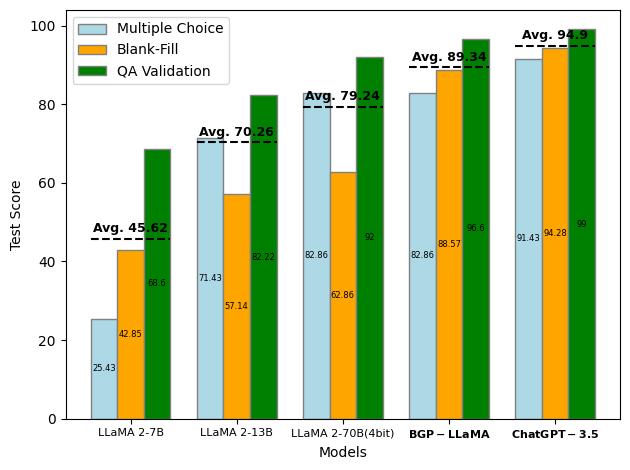

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['LLaMA 2-7B', 'LLaMA 2-13B', 'LLaMA 2-70B(4bit)', 'BGP-LLaMA', 'ChatGPT-3.5']

# Evaluation test scores
multiple_choice_scores = [25.43, 71.43, 82.86, 82.86, 91.43]
blank_fill_scores = [42.85, 57.14, 62.86, 88.57, 94.28]
qa_val_scores = [68.60, 82.22, 92, 96.6, 99]

# Average scores
avg_scores = [45.62, 70.26, 79.24, 89.34, 94.90]

# Setting the bar width and positions
barWidth = 0.25
r1 = np.arange(len(multiple_choice_scores))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Creating the bars with the new colors
bars1 = plt.bar(r1, multiple_choice_scores, color='lightblue', width=barWidth, edgecolor='grey', label='Multiple Choice')
bars2 = plt.bar(r2, blank_fill_scores, color='orange', width=barWidth, edgecolor='grey', label='Blank-Fill')
bars3 = plt.bar(r3, qa_val_scores, color='green', width=barWidth, edgecolor='grey', label='QA Validation')

# Function to add value labels on the bars
def add_labels(bars, scores):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(scores[bars.index(bar)],2), 
                 ha='center', va='center', color='black', fontsize=6)

add_labels(bars1, multiple_choice_scores)
add_labels(bars2, blank_fill_scores)
add_labels(bars3, qa_val_scores)

# Plotting average scores as dotted lines and adding exact numbers
for i in range(len(models)):
    plt.plot([i-0.125, i+0.625], [avg_scores[i], avg_scores[i]], 'k--')
    plt.text(i+barWidth, avg_scores[i] + 1, "Avg. " + str(avg_scores[i]), ha='center', va='bottom', color='black', fontsize=9, fontweight='bold')

# Labeling the graph with reduced font size for model names
plt.ylabel('Test Score')
plt.xlabel('Models')

# Handling bold model names
xticks_labels = [label if label not in ['BGP-LLaMA', 'ChatGPT-3.5'] else r'$\bf{{{}}}$'.format(label) for label in models]
plt.xticks([r + barWidth for r in range(len(multiple_choice_scores))], xticks_labels, fontsize=8)

plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

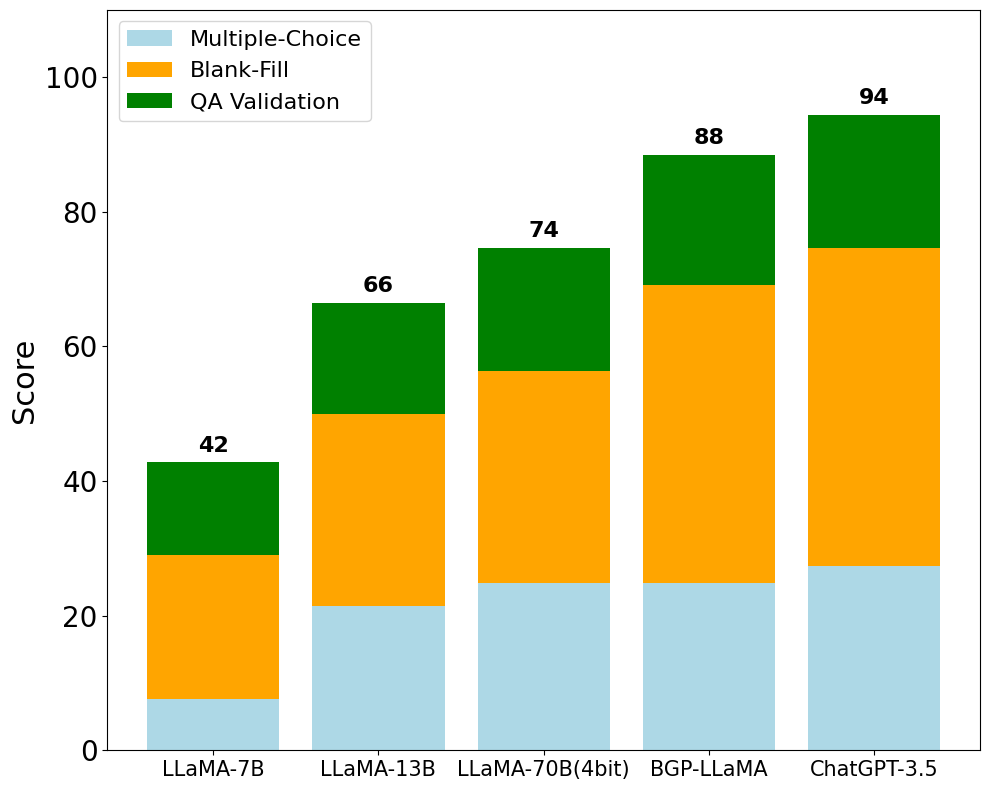

In [4]:
import matplotlib.pyplot as plt

# Packet Analysis - 80, 82
# Performance Analysis - 70, 78
# IP Routing Analysis - 97, 49

# Model scores and weights
models_scores = {
    "LLaMA-7B": [0, 27, 0],
    "LLaMA-13B": [0, 58, 0],
    "LLaMA-70B": [0, 62, 0],
    "Mobile-LLaMA": [80, 70, 97],
    "ChatGPT-3.5": [82, 78, 49]
}


for model, scores in models_scores.items():
    weighted_scores = [score * weight for score, weight in zip(scores, weights)]
    weighted_total = sum(weighted_scores)
    
    weighted_task_scores[model] = weighted_scores
    weighted_total_scores[model] = weighted_total

# Plotting
colors = ['lightblue', 'orange', 'green']
labels = ["Multiple-Choice", "Blank-Fill", "QA Validation"]
models = list(weighted_total_scores.keys())

plt.figure(figsize=(10, 8))

# Plot each task's contribution for each model
bottoms = [0] * len(models)
for idx, color in enumerate(colors):
    values = [weighted_task_scores[model][idx] for model in models]
    plt.bar(models, values, bottom=bottoms, color=color, label=labels[idx])
    bottoms = [b + v for b, v in zip(bottoms, values)]

# Annotate with the total score on top of each bar
for i, model in enumerate(models):
    total_score = weighted_total_scores[model]
    plt.text(i, total_score + 1, str(int(total_score)), ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.ylabel('Score', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.ylim(0, 110)  # Adjust y-axis scale
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.show()

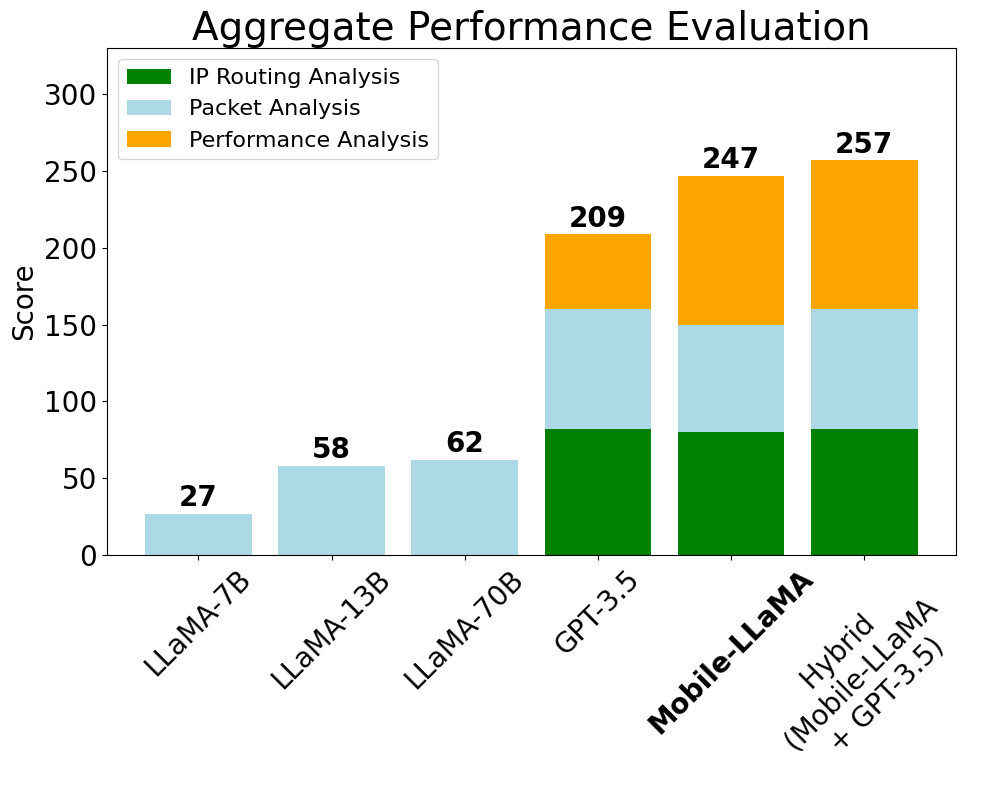

In [14]:
import matplotlib.pyplot as plt
# Adjusting the code to set the "Mobile-LLaMA" x-axis label to bold
# Model scores and weights
models_scores = {
    "LLaMA-7B": [0, 27, 0],
    "LLaMA-13B": [0, 58, 0],
    "LLaMA-70B": [0, 62, 0],
    "GPT-3.5": [82, 78, 49],
    "Mobile-LLaMA": [80, 70, 97],
    "Hybrid \n(Mobile-LLaMA \n+ GPT-3.5)": [82, 78, 97]
}

# Calculate the total score for each model
weighted_total_scores = {model: sum(scores) for model, scores in models_scores.items()}

# Create a list of task labels
task_labels = ["IP Routing Analysis", "Packet Analysis", "Performance Analysis"]

# Create a list of colors for the tasks
colors = ['green', 'lightblue', 'orange']

# Create a list of model names
models = list(models_scores.keys())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Initialize the bottoms for each task
bottoms = [0] * len(models)

# Plot each task's contribution for each model
for idx, color in enumerate(colors):
    values = [scores[idx] for scores in models_scores.values()]
    ax.bar(models, values, bottom=bottoms, color=color, label=task_labels[idx])
    bottoms = [b + v for b, v in zip(bottoms, values)]

# Annotate with the total score on top of each bar
for i, model in enumerate(models):
    total_score = weighted_total_scores[model]
    ax.text(i, total_score + 1, str(int(total_score)), ha='center', va='bottom', fontsize=20, fontweight='bold')

# Set labels and formatting
ax.set_ylabel('Score', fontsize=20)
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models, fontsize=20, rotation=45)
ax.set_title("Aggregate Performance Evaluation", fontsize=28)
# Now, iterate through the x-tick labels to apply bold weight conditionally
for label in ax.get_xticklabels():
    if label.get_text() == 'Mobile-LLaMA':
        label.set_weight('bold')
ax.set_yticks(range(0, 301, 50))
ax.set_yticklabels([str(i) for i in range(0, 301, 50)], fontsize=20)
ax.set_ylim(0, 330)
ax.legend(loc='upper left', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

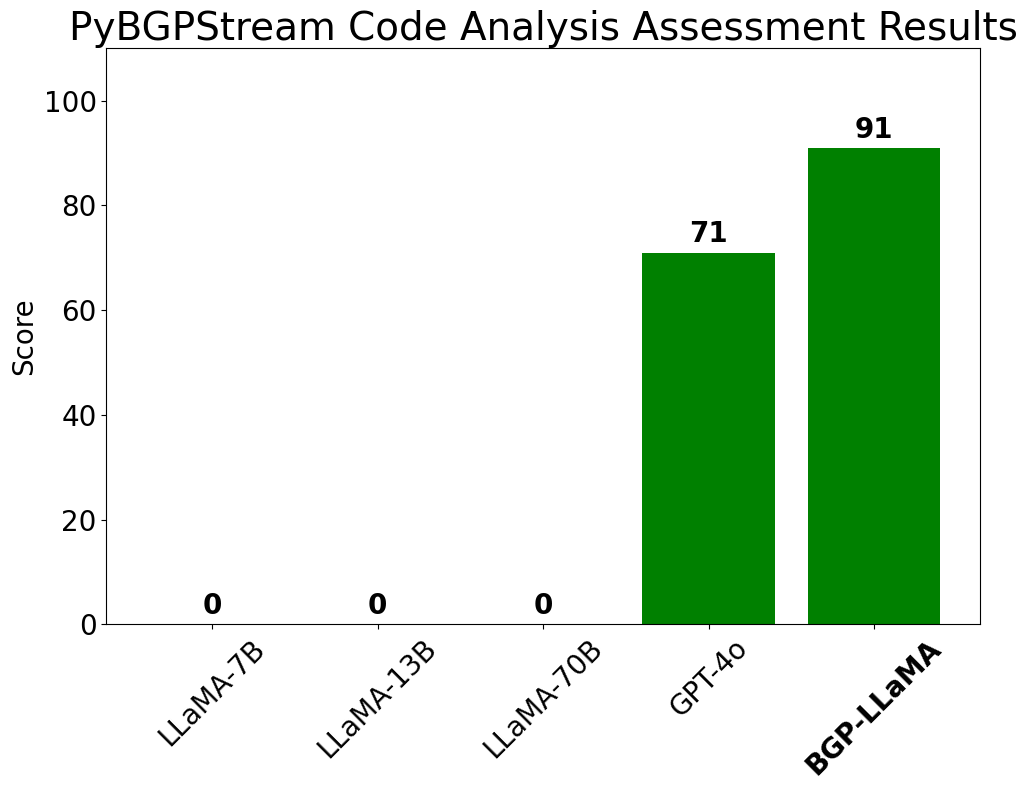

In [1]:
import matplotlib.pyplot as plt
# models_scores = {
#     "LLaMA-7B": [0, 27, 0],
#     "LLaMA-13B": [0, 58, 0],
#     "LLaMA-70B": [0, 62, 0],
#     "ChatGPT-3.5": [82, 78, 49],
#     "Mobile-LLaMA": [80, 70, 97]
# }

# Updated model scores
# models_scores = {
#     "LLaMA-7B": 27,
#     "LLaMA-13B": 58,
#     "LLaMA-70B": 62,
#     "GPT-3.5": 78,
#     "Mobile-LLaMA": 70,
# }
models_scores = {
    "LLaMA-7B": 0,
    "LLaMA-13B": 0,
    "LLaMA-70B": 0,
    "GPT-4o": 71,
    "BGP-LLaMA": 91,
    # "GPT-4o (PE)": 97,
}
# models_scores = {
#     "LLaMA-7B": 0,
#     "LLaMA-13B": 0,
#     "LLaMA-70B": 0,
#     "GPT-3.5": 82,
#     "Mobile-LLaMA": 80,
# }

# Create a list of model names and scores
models = list(models_scores.keys())
scores = list(models_scores.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the scores for each model
# bars = ax.bar(models, scores, color='orange')
bars = ax.bar(models, scores, color='green')
# bars = ax.bar(models, scores, color='lightblue')

# Set labels and formatting
ax.set_ylabel('Score', fontsize=20)
ax.set_xticks(range(len(models)))
# Set x-tick labels and apply bold formatting conditionally in a separate step
ax.set_xticklabels(models, fontsize=20, rotation=45)

# Now, iterate through the x-tick labels to apply bold weight conditionally
for label in ax.get_xticklabels():
    if label.get_text() == 'BGP-LLaMA':
        label.set_weight('bold')

ax.set_yticks(range(0, 111, 20))  # Adjusting the y-axis range
ax.set_yticklabels([str(i) for i in range(0, 111, 20)], fontsize=20)
ax.set_ylim(0, 110)
# ax.set_title("Performance Analysis Evaluation", fontsize=28)
ax.set_title("PyBGPStream Code Analysis Assessment Results", fontsize=28)
# ax.set_title("Packet Analysis", fontsize=28)

# Adding values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=20, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()
